# Mushroom Toxicity Classification
---

After completing a few exercises comparing classification approaches with the MNIST Digits dataset, I wanted a little more practice using classification algorithms.  I returned to [Kaggle](https://www.kaggle.com/datasets), so as to simplify data retrieval and preprocessing.  After perusing the available datasets (as of 20170502), I decided to try out the [Mushroom dataset](https://www.kaggle.com/uciml/mushroom-classification), as one of intermediate complexity (it's still probably simpler than the Digits dataset, but I like the biological application).

In [1]:
# Get the data (downloaded and stored on Dropbox)
import sys
# on PC or Mac:
sys.path.append('C:\\Users\\DMacKellar\\Dropbox\\Coding\\Python\\Kaggle\\')

import pydotplus
import six
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
mush = pd.read_csv('mushrooms.csv')

In [2]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Next, to explore the data a bit.  The [Kaggle overview](https://www.kaggle.com/uciml/mushroom-classification) states:
<br /><br />
<font color='blue'>
"This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy."</font>

The breakdown of the characteristics is as follows:
<br /><br /><font color='blue'>
"
Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s<br /><br />
cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s<br /><br />
cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y<br /><br />
bruises: bruises=t,no=f<br /><br />
odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s<br /><br />
gill-attachment: attached=a,descending=d,free=f,notched=n<br /><br />
gill-spacing: close=c,crowded=w,distant=d<br /><br />
gill-size: broad=b,narrow=n<br /><br />
gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,<br /><br /> green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y<br /><br />
stalk-shape: enlarging=e,tapering=t<br /><br />
stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?<br /><br />
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s<br /><br />
stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s<br /><br />
stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y<br /><br />
stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y<br /><br />
veil-type: partial=p,universal=u<br /><br />
veil-color: brown=n,orange=o,white=w,yellow=y<br /><br />
ring-number: none=n,one=o,two=t<br /><br />
ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z<br /><br />
spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y<br /><br />
population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y<br /><br />
habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
"
</font>

This is an interesting dataset; available classes for each attribute vary from 1 to 12 (although the description says 'veil-type' has two values, only one is found in the dataset):

In [34]:
x = mush.describe().T['unique']
print(' simplest category: ', x.min(), '\n',
      'most complex cat: ', x.max(), '\n',
      'possible combinations: ', np.product(x.ravel()))

 simplest category:  1 
 most complex cat:  12 
 possible combinations:  243799621632000


I'm curious about the distribution of instances across different values for the features; the greatest equality would be a uniform distribution, with equal numbers of each possible value.  For instance, cap shape could have equal numbers of each of the 5 categories: bell, conical, convex, flat, knobbed, sunken.  I'll try visualizing them all as bar plots.

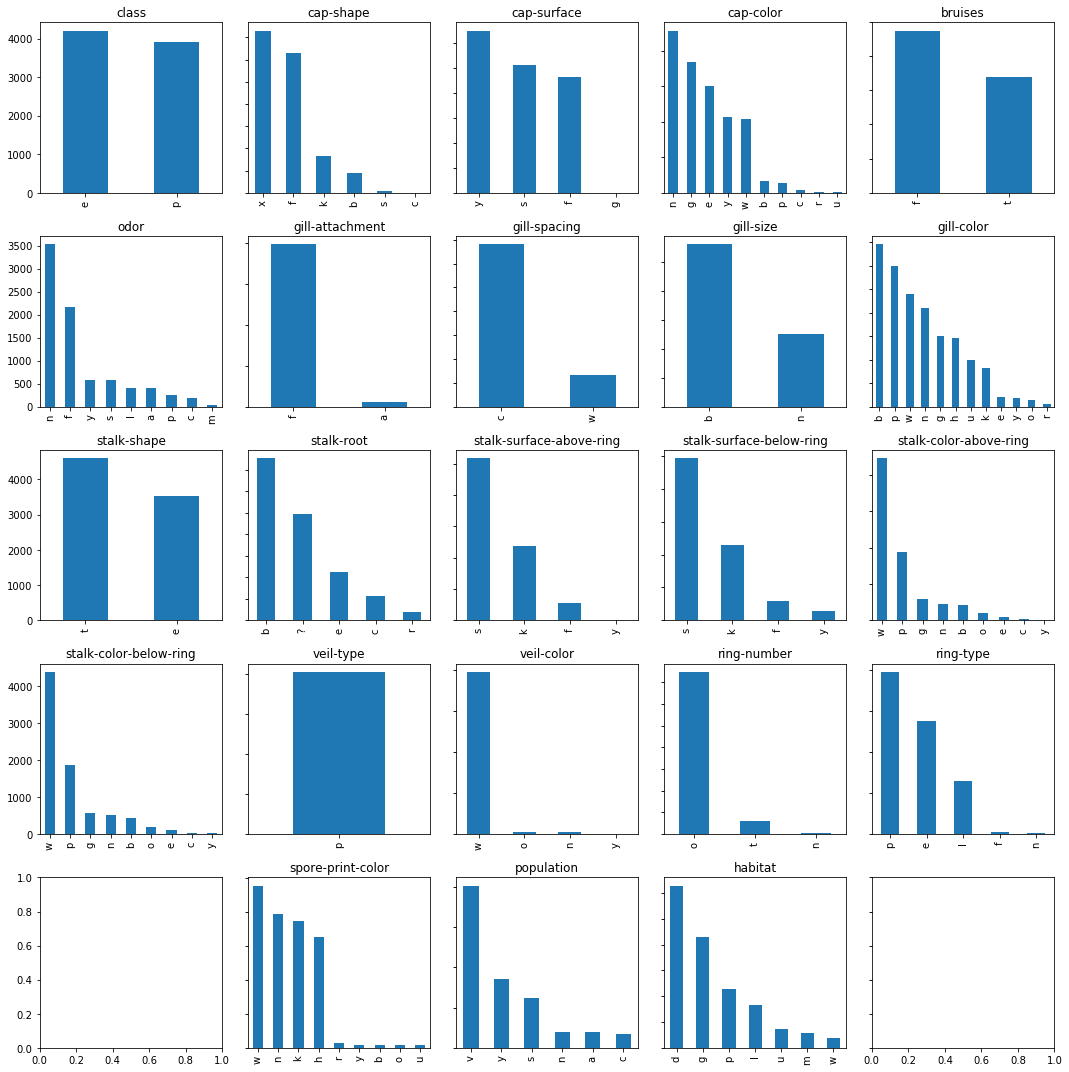

In [3]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))

axs = ['ax%i' % i for i in range(23)]
# mush has 23 features; need 23 plots, maybe 4 rows with 5 columns, 1 with 3
gsx = sorted(list(range(5))*5)
gsx = gsx[:-2]
gsy = list(range(5))*4
gsy.extend([1, 2, 3])
features = [feature for feature in mush]
count = list(range(1, 24))

for a, x, y, f, c in zip(axs, gsx, gsy, features, count):
    mush[f].value_counts().plot(kind='bar', ax=axes[x,y], 
                                title=f, sharey=True)
plt.tight_layout()
plt.show()

The dataset is clean; no missing data:

In [31]:
mush.isnull().values.ravel().sum()

0

It contains 8124 observations, each with 23 characteristics:

In [32]:
print(mush.shape)
print(mush.drop_duplicates().shape)

(8124, 23)
(8124, 23)


The description above says that they represent 23 different species across 3 genera, but I'm wondering if they're conflating the number of species with number of characteristics.  How could 23 species generate 8,000 different combinations of characteristics?  In general, macro-scale morphological/physiological characteristics like these should be consistent across individual members.

In any case, the first feature is in fact the label, 'class', which describes each entry as either poisonous or edible.

**Since 'veil-type' only contains one category, it cannot vary and therefore cannot covary with the poisonousness of the mushrooms, so we'll drop it.**

In [35]:
print(x[x < 2])

veil-type    1
Name: unique, dtype: object


In [23]:
mush.columns.get_loc('veil-type')

16

In [2]:
print(mush.shape)
mush.drop(['veil-type'], axis=1, inplace=True)
print(mush.shape)

(8124, 23)
(8124, 22)


Next, it is apparently necessary for compatibility between categorical datasets and most ML approaches that we substitute the arbitrary, letter-based ordinal features with dummy variables (integers in the range 0:n-1, where n is the number of categories in a given feature).  It sounds like the easiest way to go is the Pandas pd.get_dummies() method.

In [3]:
trial = pd.get_dummies(mush, columns=mush.columns)
print(trial.shape)
trial.head()

(8124, 118)


,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


Ok, so that worked differently than I expected.  It doesn't assign an integer for each categorical variable, it splits each feature out into multiple new features, each representing the feature and one of the possible categorical variables, and assigns a binary representation to whether or not that instance has that categorical variable for that feature.  This greatly amplifies the size of the dataframe, and makes the dataset pretty sparse.  It is, however, a perfectly reasonable and interpretable way to achieve mapping of the categorical data space to dummy numerical variables.  (Note: the former idea about how get_dummies would work is actually implemented in another method: sklearn's [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).)

In fact, the naive assumption I stated above about how I expected categorical values to be converted into integers and the column numbers kept constant after transformation was flawed: if you convert cap-shapes b, c, f, k, s, x, and f to integers like 1 through 7, downstream ML tools would probably think that the values mattered besides distinguishing them; i.e., you'd confer the concept of relative numerical distance to you categorical data, such that the first two (cap shapes 'bell' and 'conical') were more similar to one another than either was to the last (cap shape 'flat').  That would probably mutate the data so as to introduce invalid/unwarranted assumptions.  (Note: after reading other descriptions of this phenomenon, the term I was looking for to describe the invalid info integers would introduce to the categorical values was 'ordinality'; categorical values aren't necessarily ordinal, while integers necessarily are.)

Given that this was the case, however, complicates the use of the 'class' label, which I still want to be able to feed to the ML algorithms as a single column.  So I'll drop the first two columns from the new df, and concat the original mush 'class' column to the df so that it remains unaltered.

...But I still need to binarize the labels.  That can be done by calling pd.get_dummies() and adding the argument 'prefix', and [just keeping the first column from the get_dummies output](https://youtu.be/0s_1IsROgDc?t=269).  This (as indicated in the output from the above cell) is the 'class e', meaning edible, so **a value of 1 in the resulting data will mean that the mushroom is edible; a value of 0 will indicate that it's poisonous**.

Note: a more concise (but output-equivalent) method for achieving this is built into sklearn as a distinct method: [LabelBinarizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html#sklearn.preprocessing.LabelBinarizer).

In [3]:
labels = pd.get_dummies(mush.iloc[:, 0], prefix='class').iloc[:, 0]
dumb = pd.get_dummies(mush.iloc[:, 1:], columns=mush.columns[1:])
shrooms = pd.concat([labels, dumb], axis=1)
shrooms.head()

,class_e,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


Actually, that might complicate things, since the resulting DataFrame is flat, whereas I'd like to retain the association of different categorical values with their original features.  In other words, cap-shape_b, cap-shape_c, cap-shape_f, and cap-shape_k should be separate or easily selectable as separate from cap-surface_f, cap-surface_g, ...

Perhaps the [sklearn OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) is more suitable for this purpose?

...Hmm, apparently not.  They're [essentially equivalent approaches](http://stackoverflow.com/questions/36631163/pandas-get-dummies-vs-sklearns-onehotencoder-what-is-more-efficient); both return binary outputs and break out features into separate 'feature_value' columns.  The one difference is that sklearn's approach actually doesn't handle strings as inputs, and expects integers instead.

After more searching, it appears that retaining feature information a la the LabelEncoder approach [isn't compatible with many ML algorithms](https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor).  Thus, only OneHot/get_dummies is likely to work with knn/k-means, but it also introduces a greater risk of the curse of dimensionality, which is why it's often combined with dimensionality reduction such as PCA.  I'll try the methods that may require that once, and if they take too long, I'll run it through PCA and re-try.

This dataset doesn't have a test group like the competitions do, in which unlabeled data are provided.  So we'll do train/test splits manually.  I'll use cross_val_score while training so that the results are somewhat generalizable, but I'll split out a test group first, as a hold-out group, since I don't have Kaggle's independent verification to double-check any results.  20% of the data should be good enough for a hold-out set.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    shrooms.iloc[:, 1:], shrooms.iloc[:, 0], stratify=shrooms.iloc[:, 0],
    test_size=0.2)

for df in [X_train, X_test, y_train, y_test]:
    print(df.shape)

(6499, 116)
(1625, 116)
(6499,)
(1625,)


And to double-check that stratification worked, giving similar amounts of poisonous/edible mushrooms in both sets:

In [8]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

1    0.517926
0    0.482074
Name: class_e, dtype: float64
1    0.518154
0    0.481846
Name: class_e, dtype: float64


Ok, I think we're ready to start comparing classification schemes on these data.  This objective is a binary classification, with multiple categorical features.  I haven't really dealt with this before, but it sounds like the ML approaches implemented in SKLearn all require categorical variables be converted into dummy variables first.  A bit of [discussion](https://stats.stackexchange.com/questions/95212/improve-classification-with-many-categorical-variables) online speaks to some of the ins and outs of this process.  Another good idea is to check for [correlation](https://datascience.stackexchange.com/questions/893/how-to-get-correlation-between-two-categorical-variable-and-a-categorical-variab) between variables.  It [sounds like](https://stats.stackexchange.com/questions/205712/chi-squared-for-multiple-samples) chi-squared is the test of choice for comparing categorical variables, but multiple tests may introduce more complexity (the Bonferroni correction may be applicable), and might not be essential for this dataset.

A few ML approaches that should be compatible with this problem:
* Decision Trees/Random Forests
* Naive Bayes
* k-Nearest Neighbors
* k-Means Clustering
* Support Vector Classifier
* Neural Networks

## k-NN

Apparently, it is possible to use k-Nearest Neighbors with discrete features; you convert the features into vectors in n-dimensional space, and use Euclidean distance to figure out the distance between them.  This makes some assumptions, including that each character is identically different; i.e., the colors 'blue' and 'blue-green' are as different as 'blue' is from 'red'.  For the most part, though, this seems an acceptable approach, since I have no reason to infer prior knowledge about how these characters relate to one another or to the label of poisonous/edible.

In [16]:
%%time

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=3)
knn3 = cross_val_score(knn, X_train, y_train, cv=10, n_jobs=-1)

Wall time: 7.86 s


In [17]:
print(knn3)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


Hmm.  That's surprising.  KNeighborsClassifier with just 3 neighbors predicts with 100% accuracy?  Let's try it on the hold-out test set.

In [18]:
%%time

knn1 = knn.fit(X_train, y_train)
print(knn1.score(X_test, y_test))

1.0
Wall time: 2.3 s


Hmm.  Really?  Is this dataset that trivial?  You can get 100% accuracy with k-NN, with default settings and just 3 neighbors?  No troubleshooting; no ambiguity?  I'm curious what the determinative features are.  k-NN is kind of a one-shot, black-box sort of approach, so I don't think it's easy to crack it open and gain generalizable insights about the relationship between the features and the labels.  Therefore, I'll proceed to Random Forest and try to visualize the output.

## Random Forest

It's been a little while since I played with Random Forests, back when I was working through the MNIST Digits dataset, but it's a pretty universal, go-to technique for classification, as I understand it.  It actually doesn't require dummy variables, so I should be able to use it with the original data encoding.  More importantly, I should be able to visualize the output to see what are the features that correspond with the labels most strongly.

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier()
estimators = np.round(np.logspace(0.1, 4.45, base=2, num=5).tolist()).astype(np.int)
param_grid = dict(n_estimators=estimators)
gs_cv = GridSearchCV(rfc, cv=3, n_jobs=-1, param_grid=param_grid)

In [6]:
%%time

rfc1 = gs_cv.fit(X_train, y_train)

Wall time: 3.18 s


In [7]:
print(rfc1.best_params_, '\n', rfc1.best_score_, '\n', rfc1.best_estimator_)

{'n_estimators': 5} 
 1.0 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Ok, well, that supports the idea that 100% accuracy is possible (here with just 5 estimators (Decision Trees)).  Let's double-check the best tree on the holdout data to confirm it's still 100% accurate, then try to visualize it.

In [22]:
print(rfc1.score(X_test, y_test))

1.0


Yeah, that checks out.  From [one example](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html) in the sklearn docs, there's a way to get a graph of feature importances, but that attribute isn't accessible through the GridSearchCV class, so I'll just re-fit the random forest using the basic classifier.

In [8]:
rfc2 = RandomForestClassifier(n_estimators=5)
rfc2.fit(X_train, y_train)
print(rfc2.score(X_test, y_test))

1.0


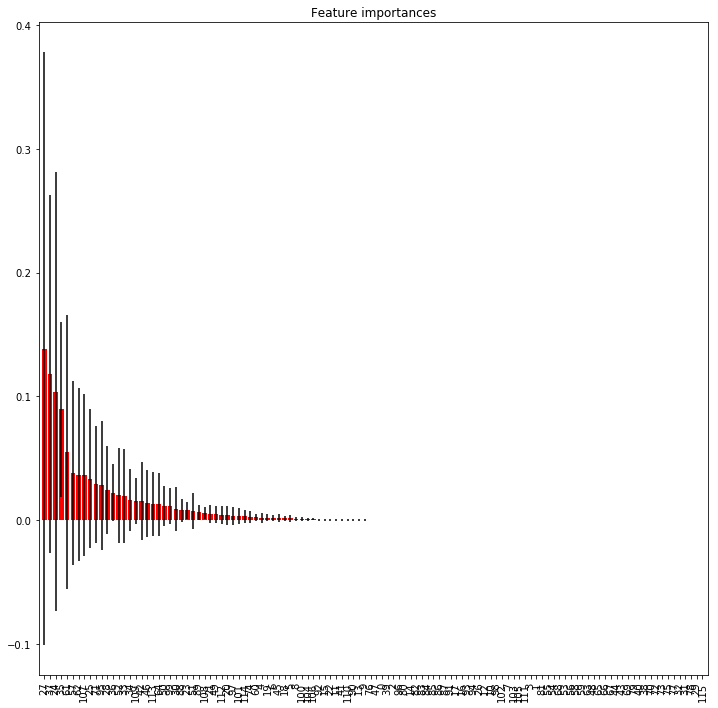

Feature ranking:
1. feature odor_n (0.138695)
2. feature gill-color_b (0.118213)
3. feature odor_f (0.103925)
4. feature gill-size_b (0.089674)
5. feature stalk-surface-below-ring_k (0.055153)
6. feature stalk-surface-above-ring_k (0.038293)
7. feature stalk-surface-below-ring_s (0.036863)
8. feature population_v (0.036716)
9. feature odor_l (0.033558)
10. feature stalk-color-above-ring_w (0.028884)


In [9]:
importances = rfc2.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc2.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 12))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices, rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()

print("Feature ranking:")

for f in range(10):
    print("%d. feature %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

Well, from the plot, it's striking how high the standard deviation is in the value of feature\_importance\_ across trees in the forest.  (Note: this is reproducible; even the order changed when I had to re-load the kernel and re-compute rfc2).

Ok, I don't really know how to interpret those.  I would assume that higher scores are more informative features, but many have a value of zero; do any of these correlate one-to-one with the labels?  Oh wait; all values are positive, so zeroes are less important to the outcome than those with any positive value but negative exponent in scientific notation.

From [one result](http://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas) about visualizing correlation matrices with pandas:

In [98]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);

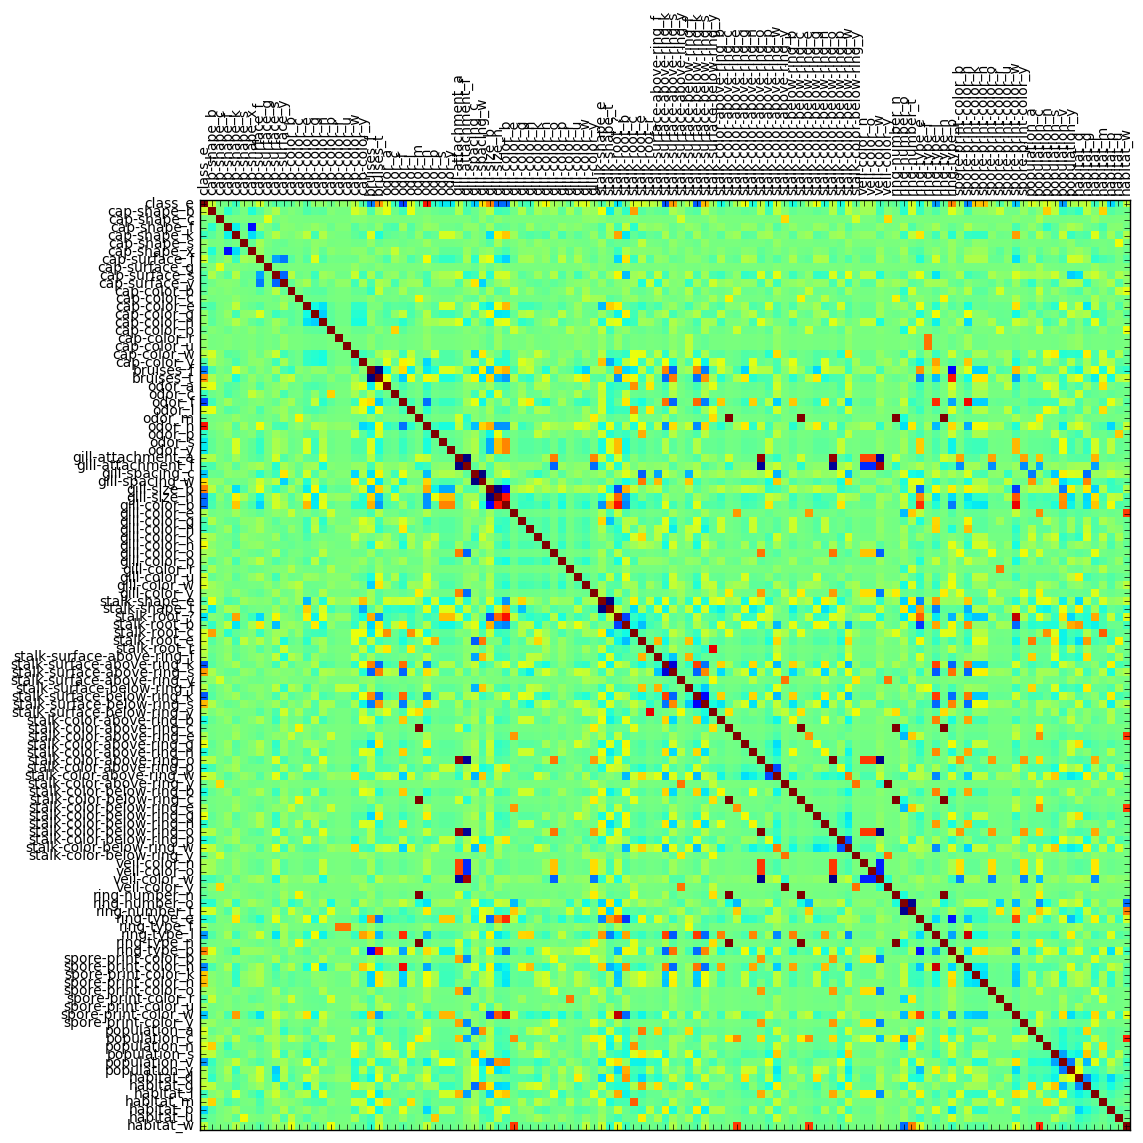

In [99]:
plot_corr(shrooms, size=12)

Hmm... that's a little too zoomed-out.  Apparently the pandas DataFrame.corr() method is the key.  There must be a way to return that for just the correlation of each feature with the label.

In [25]:
looky = shrooms.corr()
L2 = looky['class_e']
L2[(L2 < -0.5) | (L2 > 0.5)]

class_e                       1.000000
bruises_f                    -0.501530
bruises_t                     0.501530
odor_f                       -0.623842
odor_n                        0.785557
gill-size_b                   0.540024
gill-size_n                  -0.540024
gill-color_b                 -0.538808
stalk-surface-above-ring_k   -0.587658
stalk-surface-below-ring_k   -0.573524
ring-type_p                   0.540469
Name: class_e, dtype: float64

In [140]:
L2[1:].describe()

count    116.000000
mean       0.005285
std        0.253692
min       -0.623842
25%       -0.132035
50%        0.043607
75%        0.150087
max        0.785557
Name: class_e, dtype: float64

So no: no single feature alone correlates perfectly or anticorrelates perfectly with edibility.  The strongest single association is odor_n ('none'), followed by odor_f ('foul'); the former is most predictive of edibility, and the latter with poisonousness.  So the relative ease of both knn and decision trees predicting perfectly must mean that a few suites of certain features are always poisonous or edible.

Ok, back to checking out the decision tree.  [From](http://scikit-learn.org/stable/modules/tree.html#classification):

In [10]:
import os

os.path.dirname(os.path.realpath('mush_tree.dot'))

'C:\\Users\\DMacKellar\\Dropbox\\Coding\\Python\\Kaggle'

In [11]:
from sklearn.tree import export_graphviz

dotfile = six.StringIO()
i_tree = 0
with open("mush_tree.dot", 'w') as f:
    f = export_graphviz(rfc2.estimators_[0], 
                        feature_names=X_train.columns, filled=True, 
                        rounded=True, out_file = f)

tree_name = ['tree%i' % i for i in range(5)]

for i, tree_in_forest in enumerate(rfc2.estimators_):
    export_graphviz(tree_in_forest,
                feature_names=X_train.columns,
                filled=True,
                rounded=True)
    os.system('dot -Tpng tree.dot -o %s.png' % tree_name[i])

C:\Python\lib\site-packages\sklearn\tree\export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)
C:\Python\lib\site-packages\sklearn\tree\export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)
C:\Python\lib\site-packages\sklearn\tree\export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)
C:\Python\lib\site-packages\sklearn\tree\export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)
C:\Python\lib\site-packages\sklearn\tree\export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


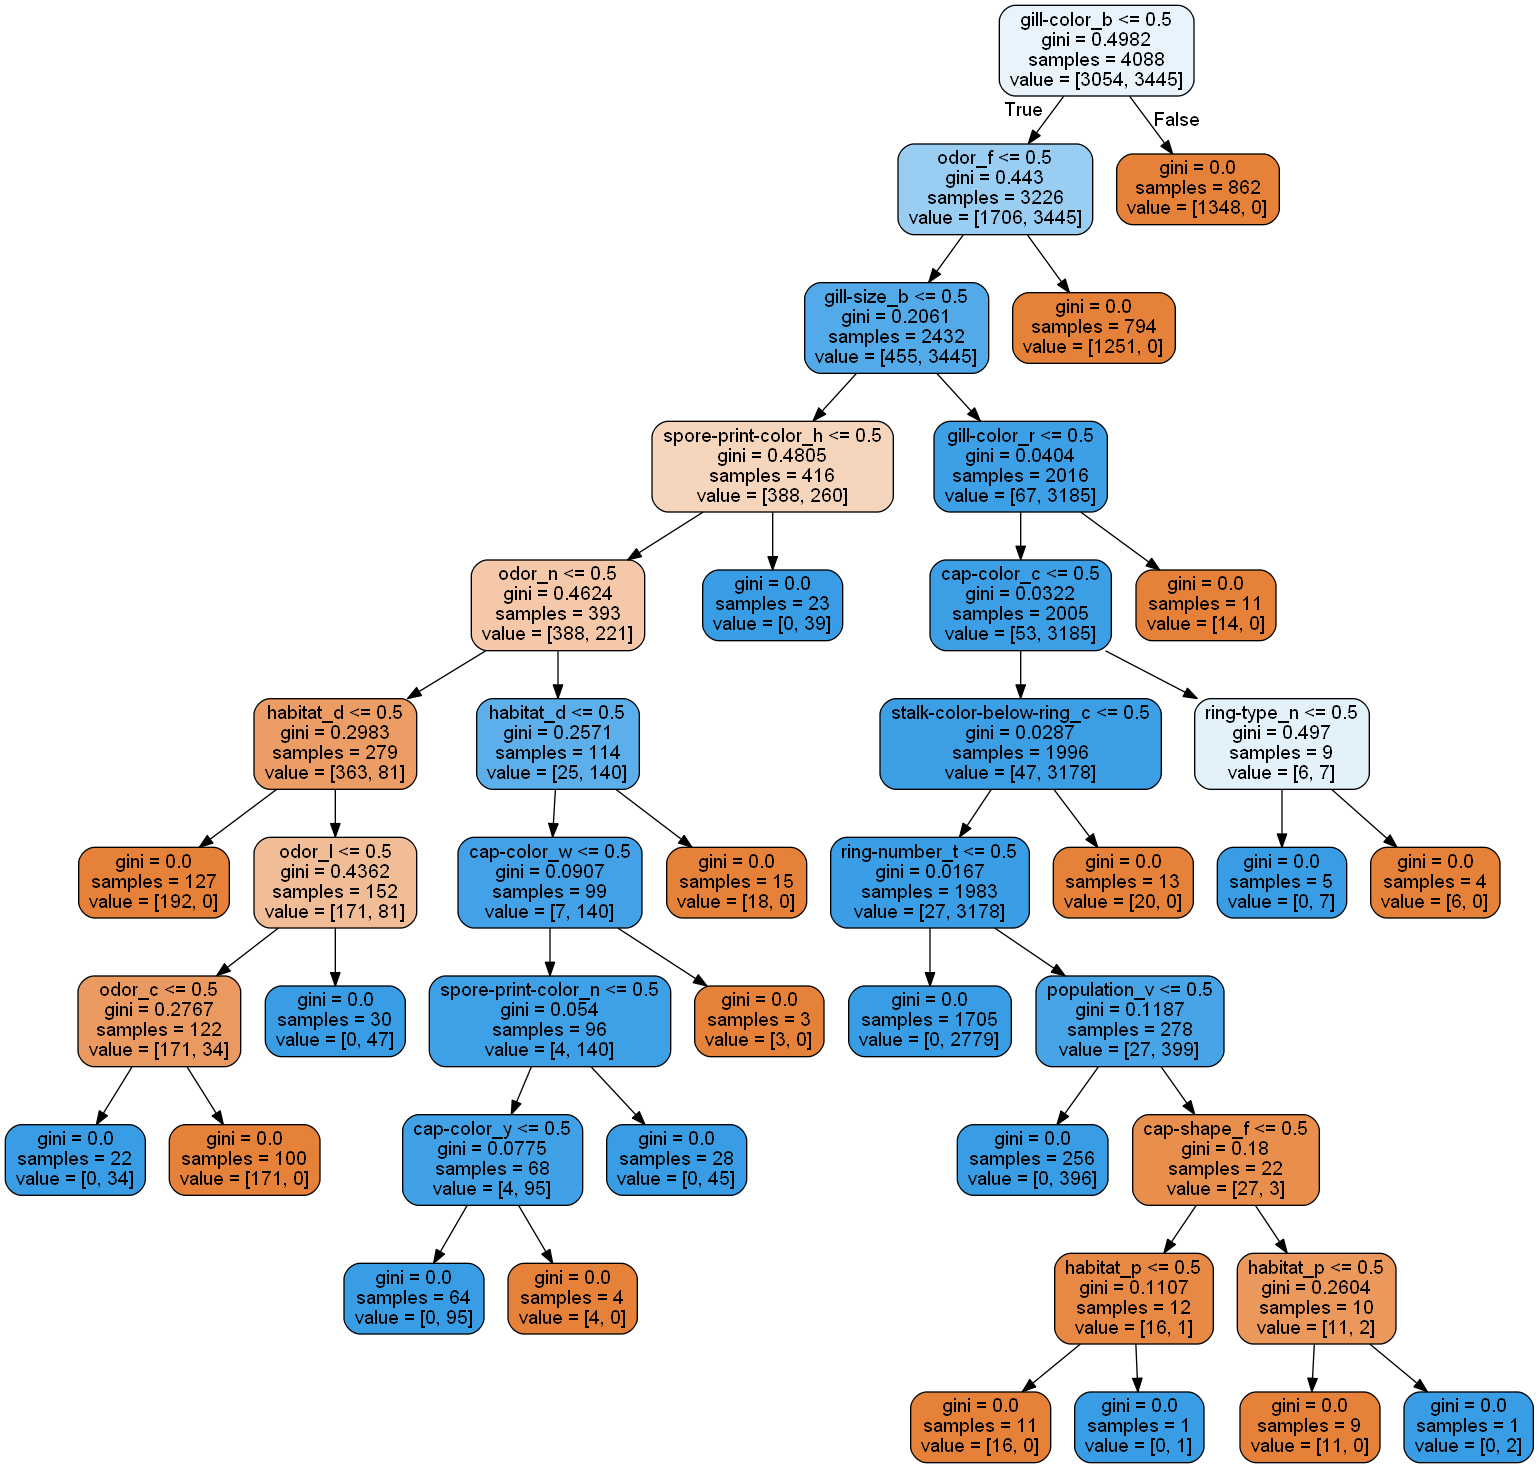

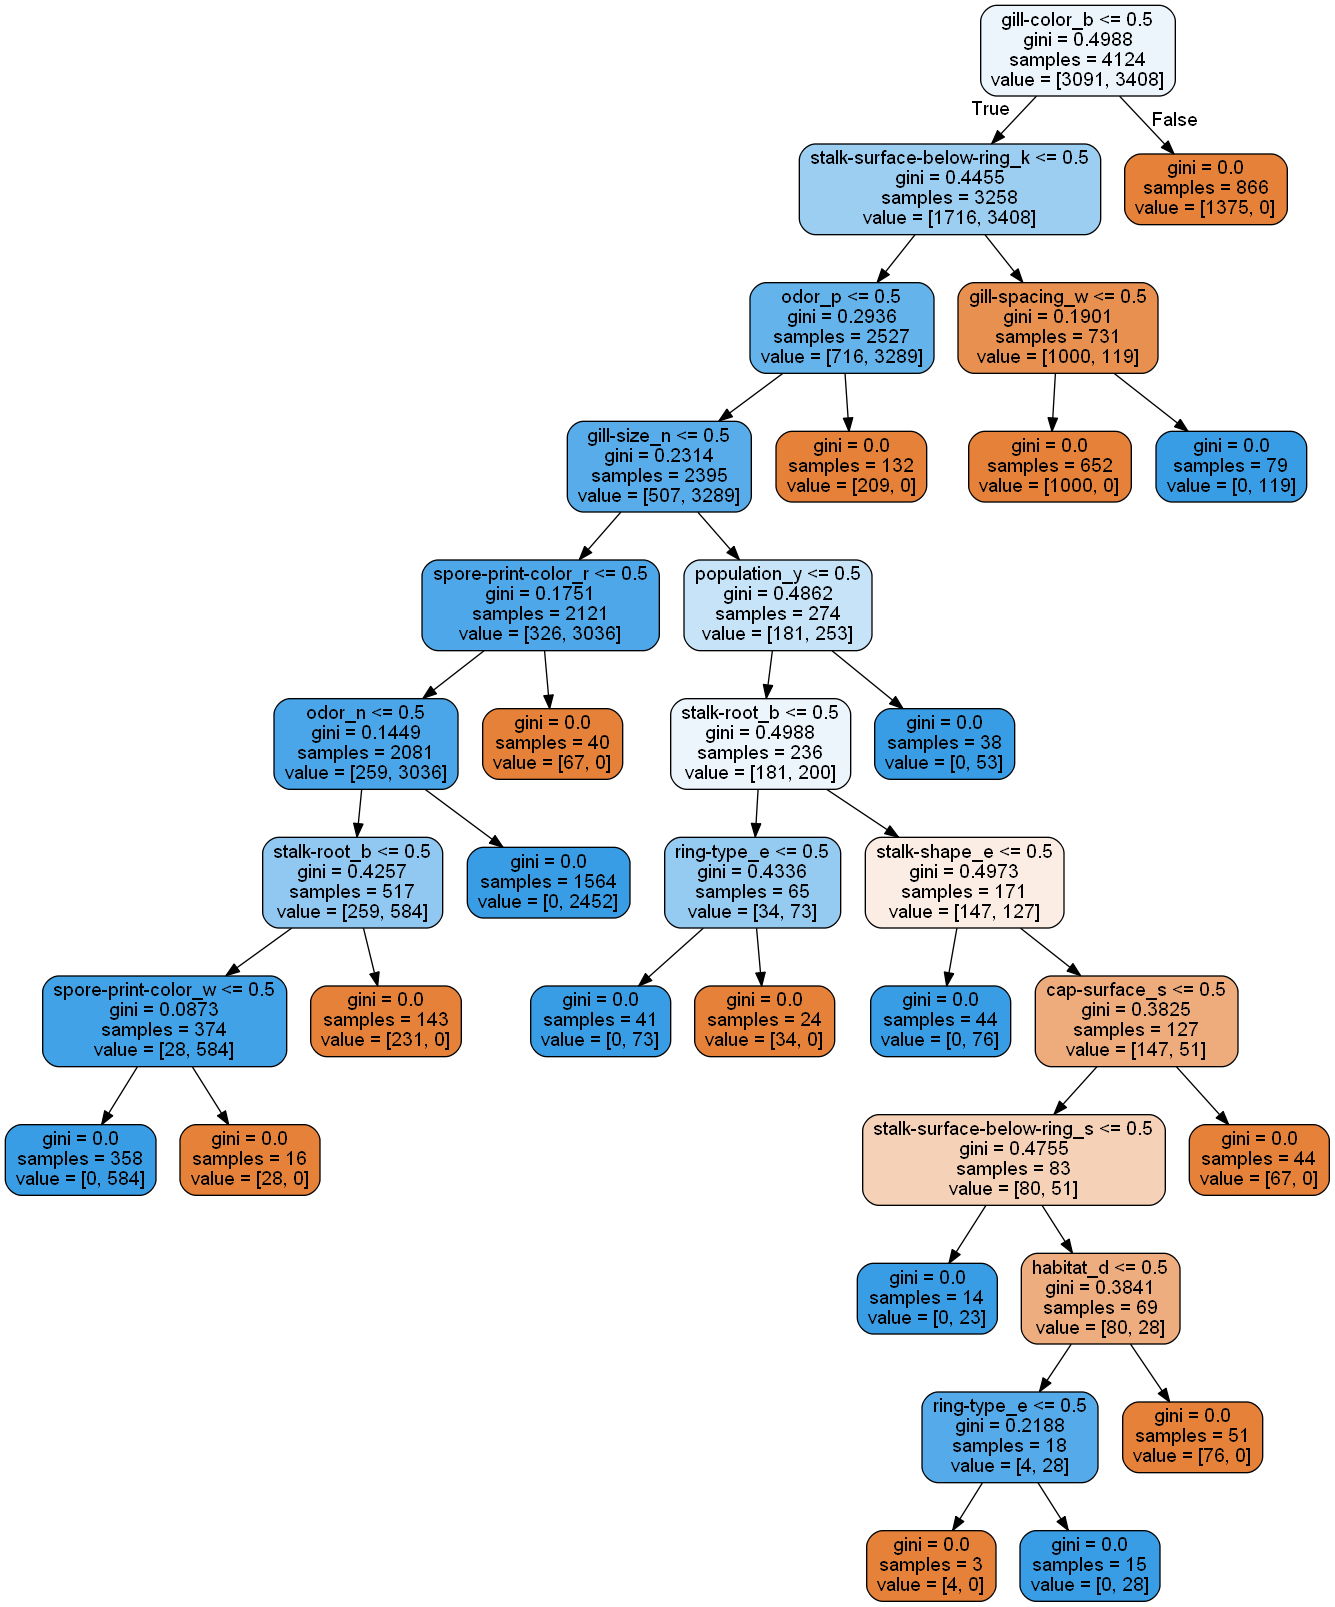

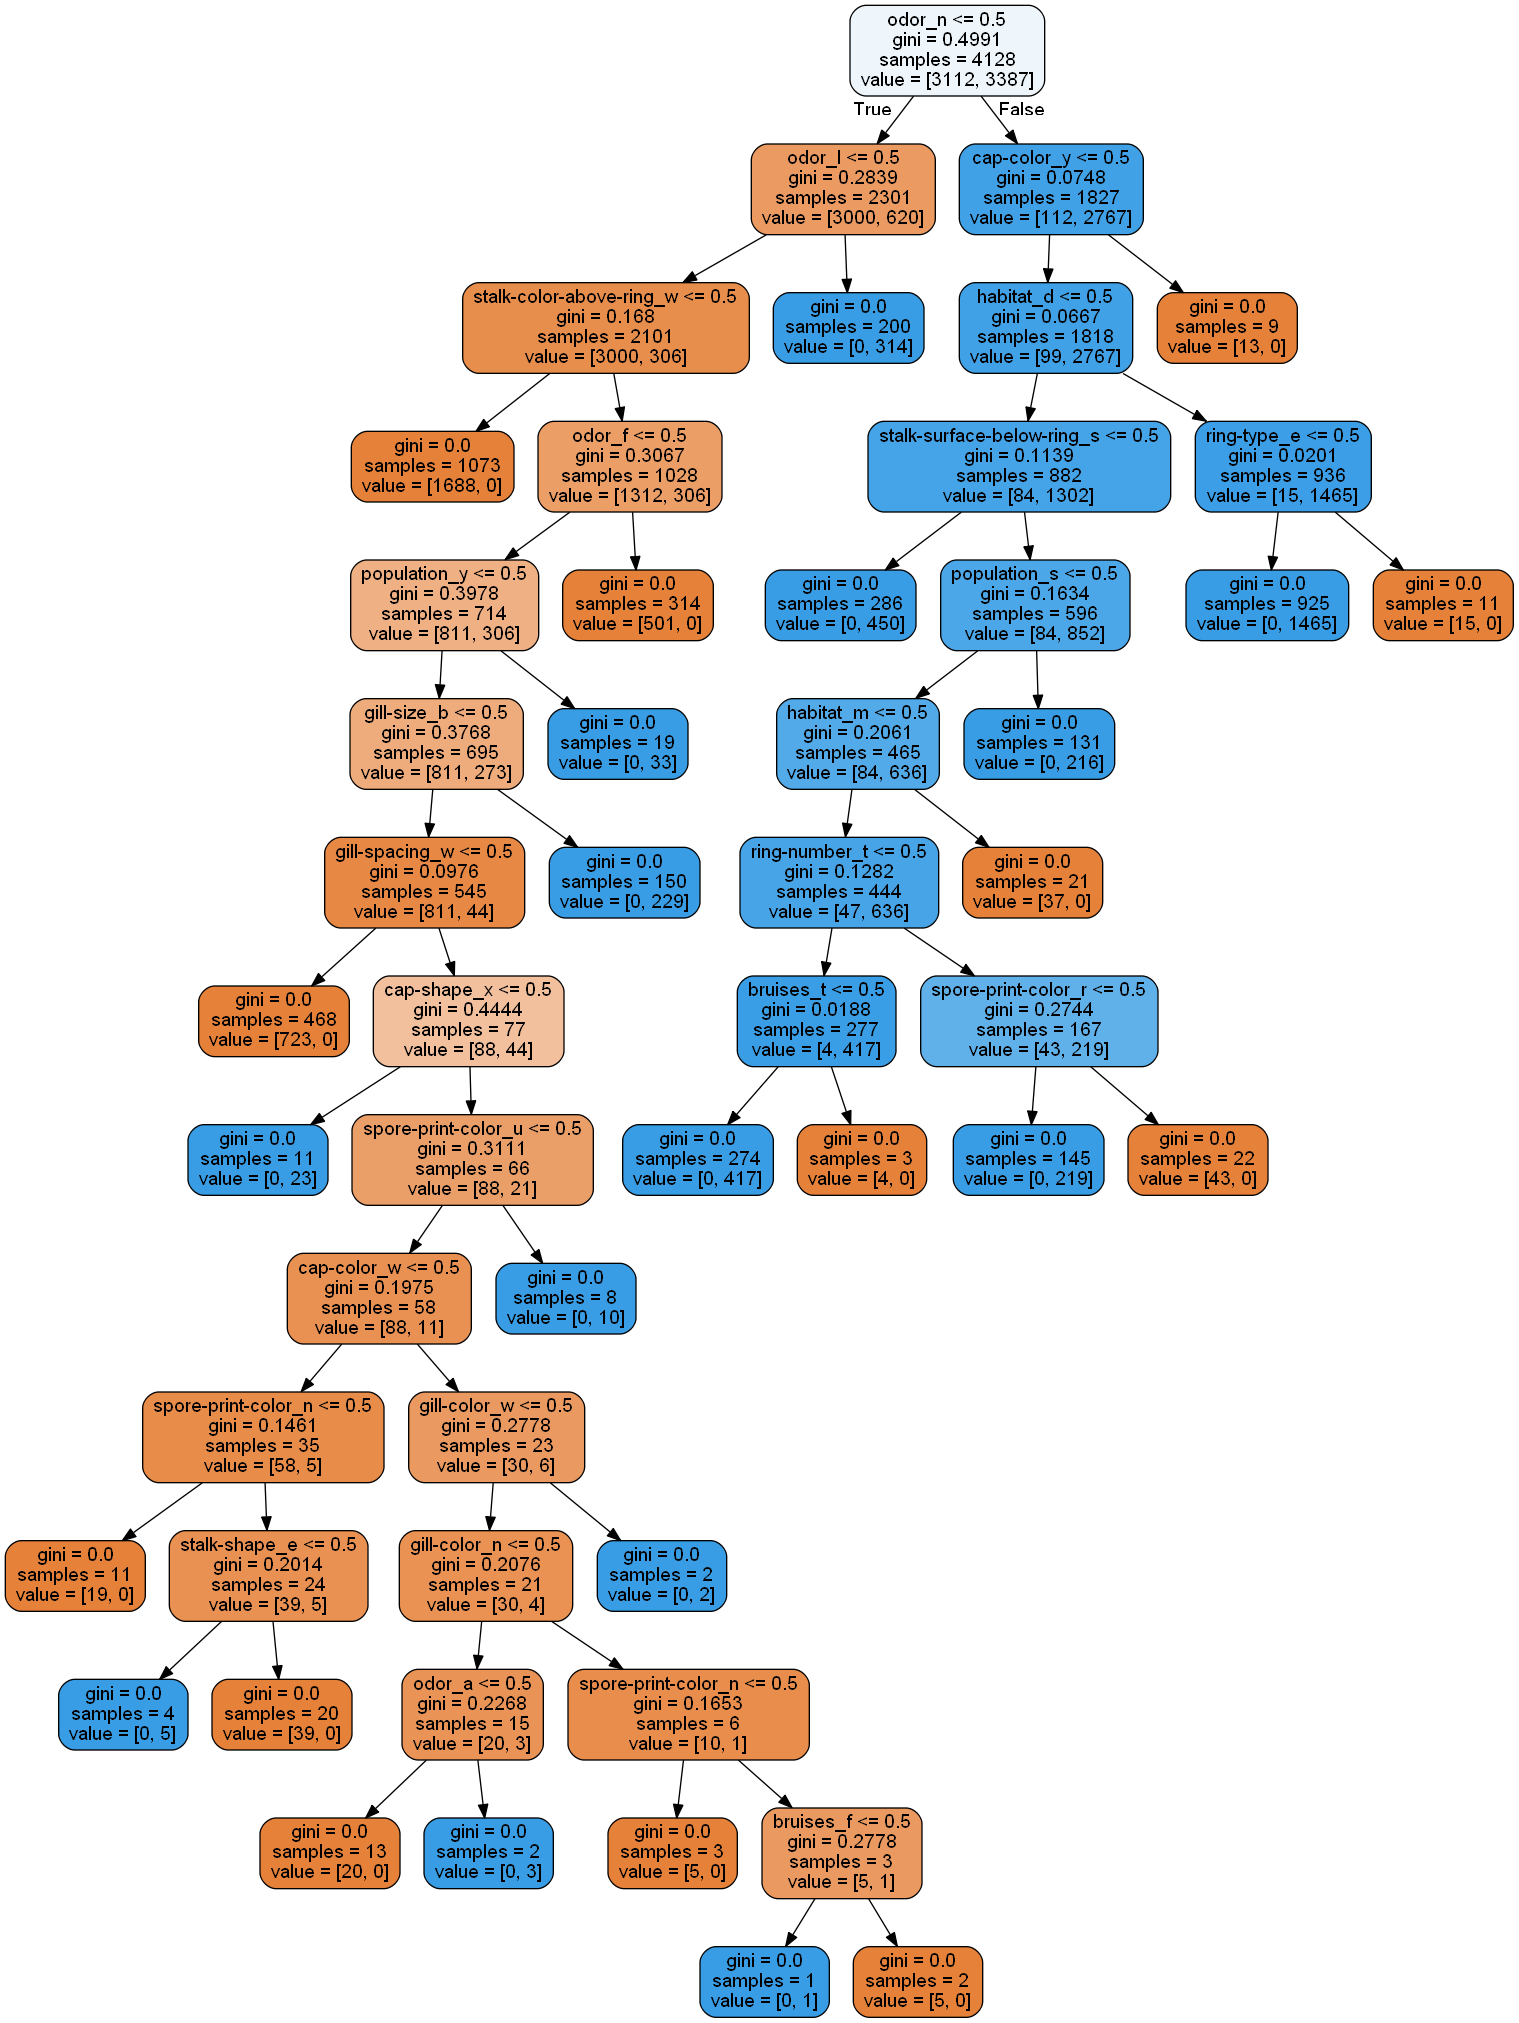

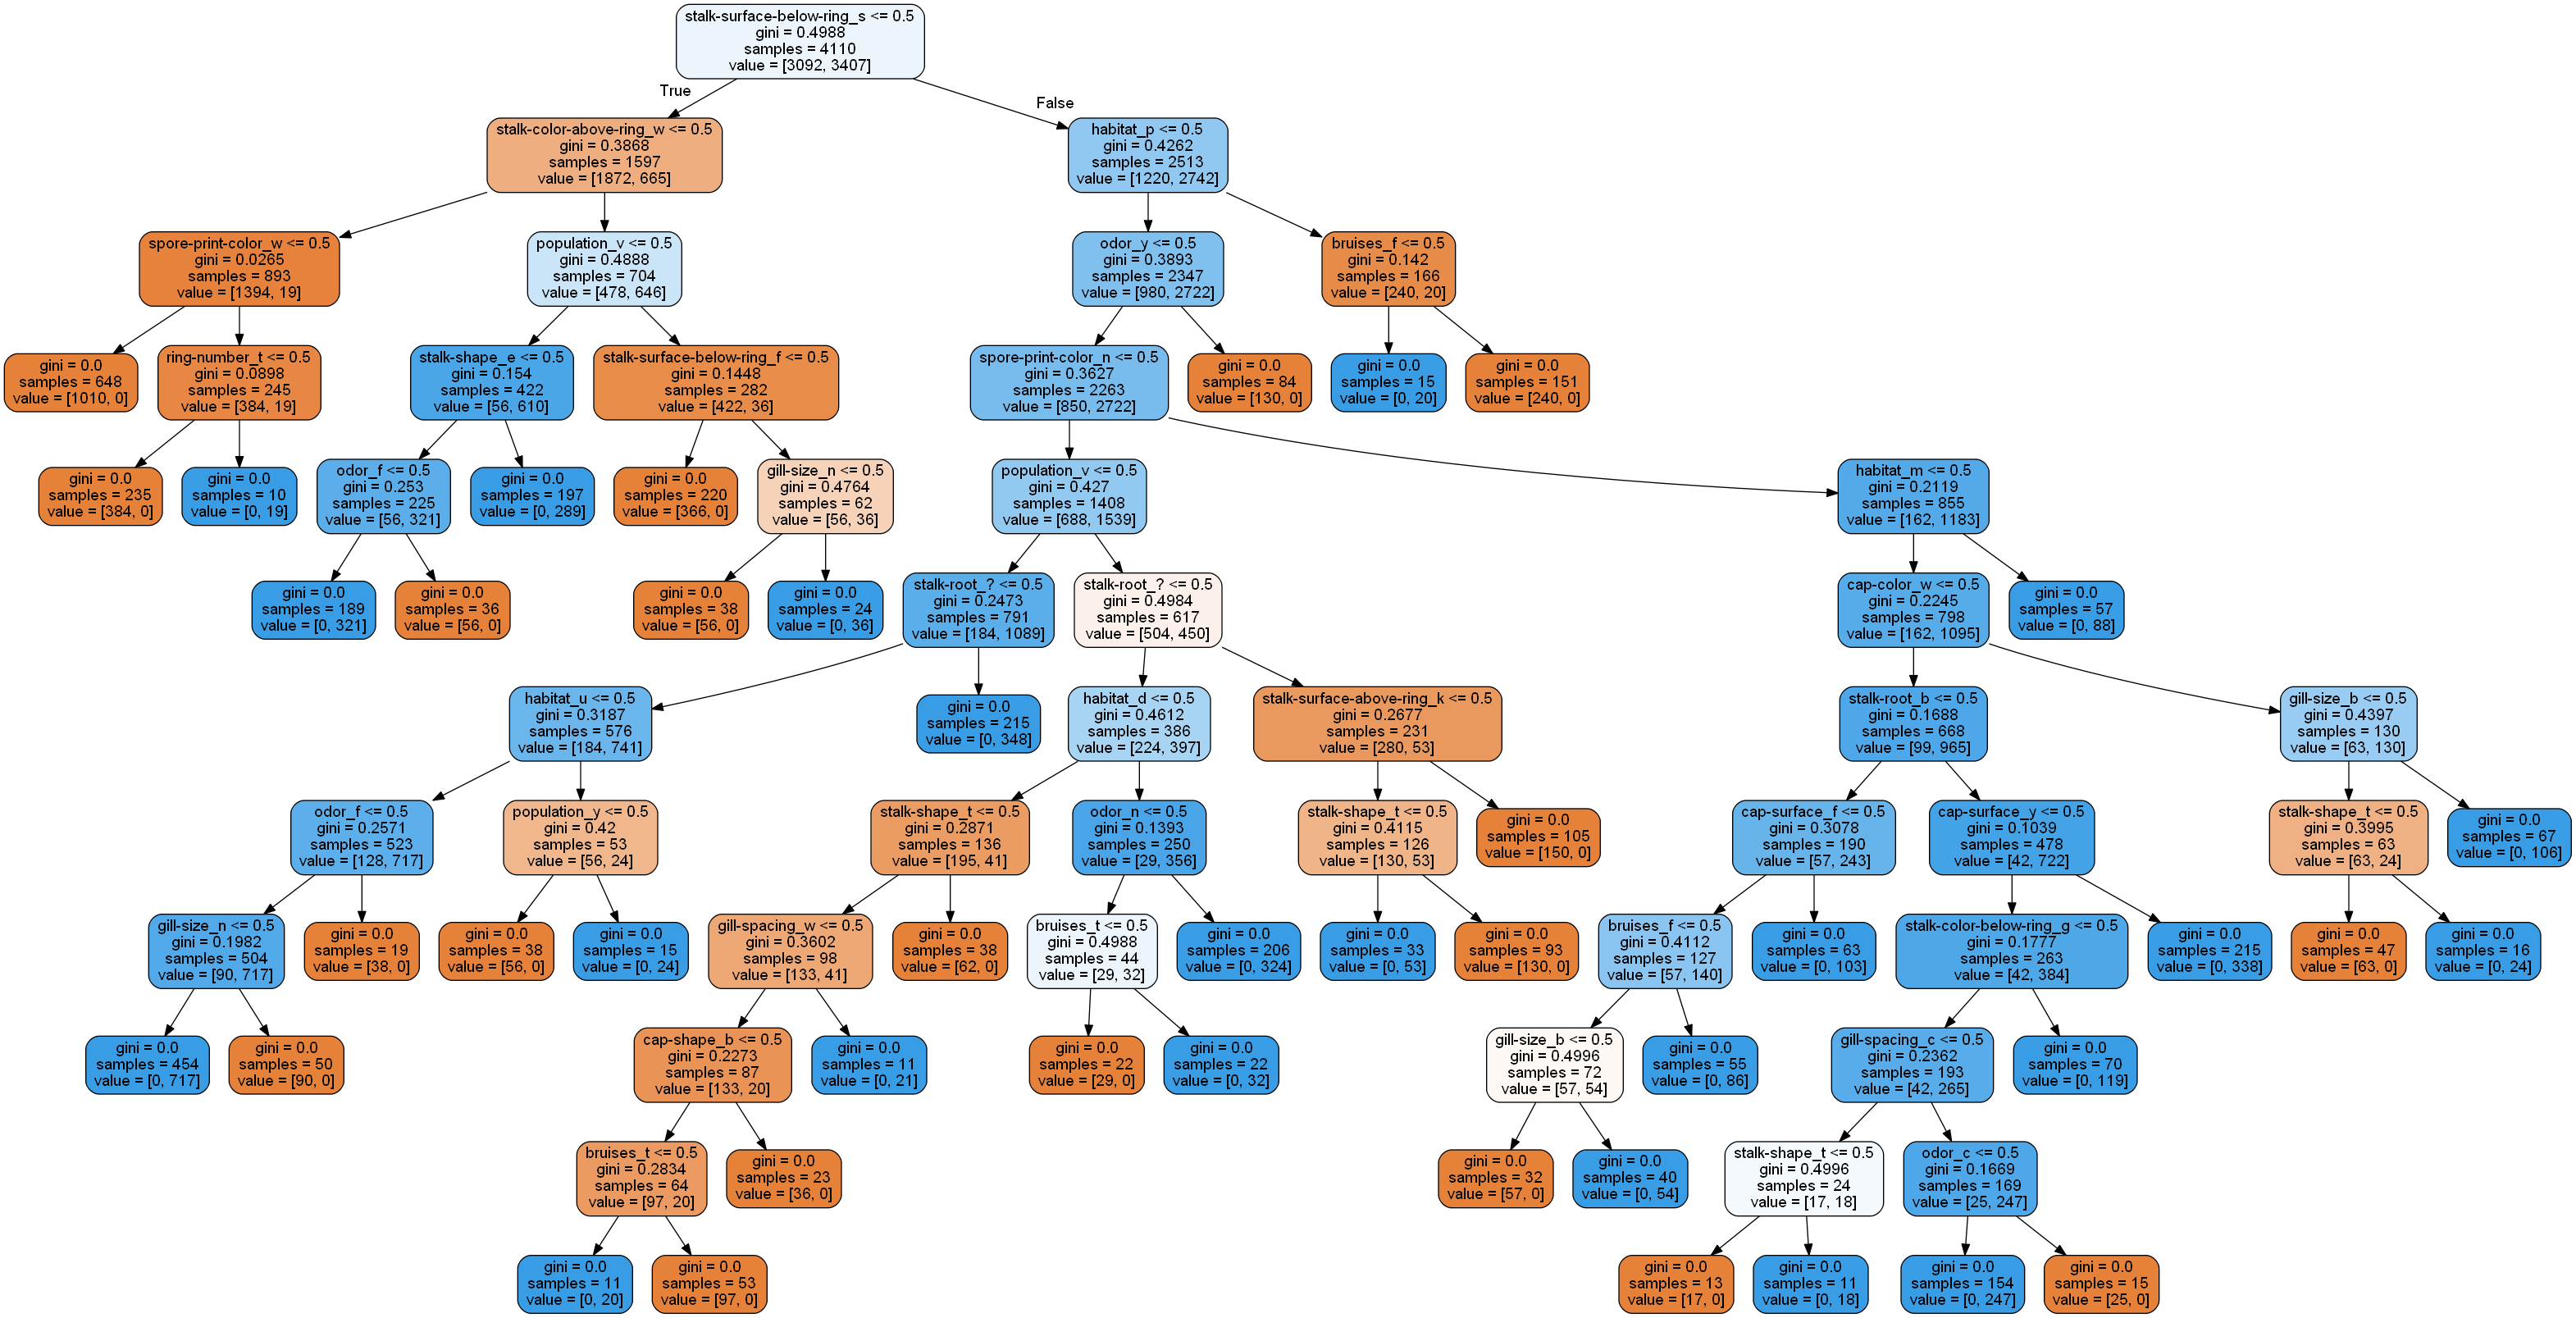

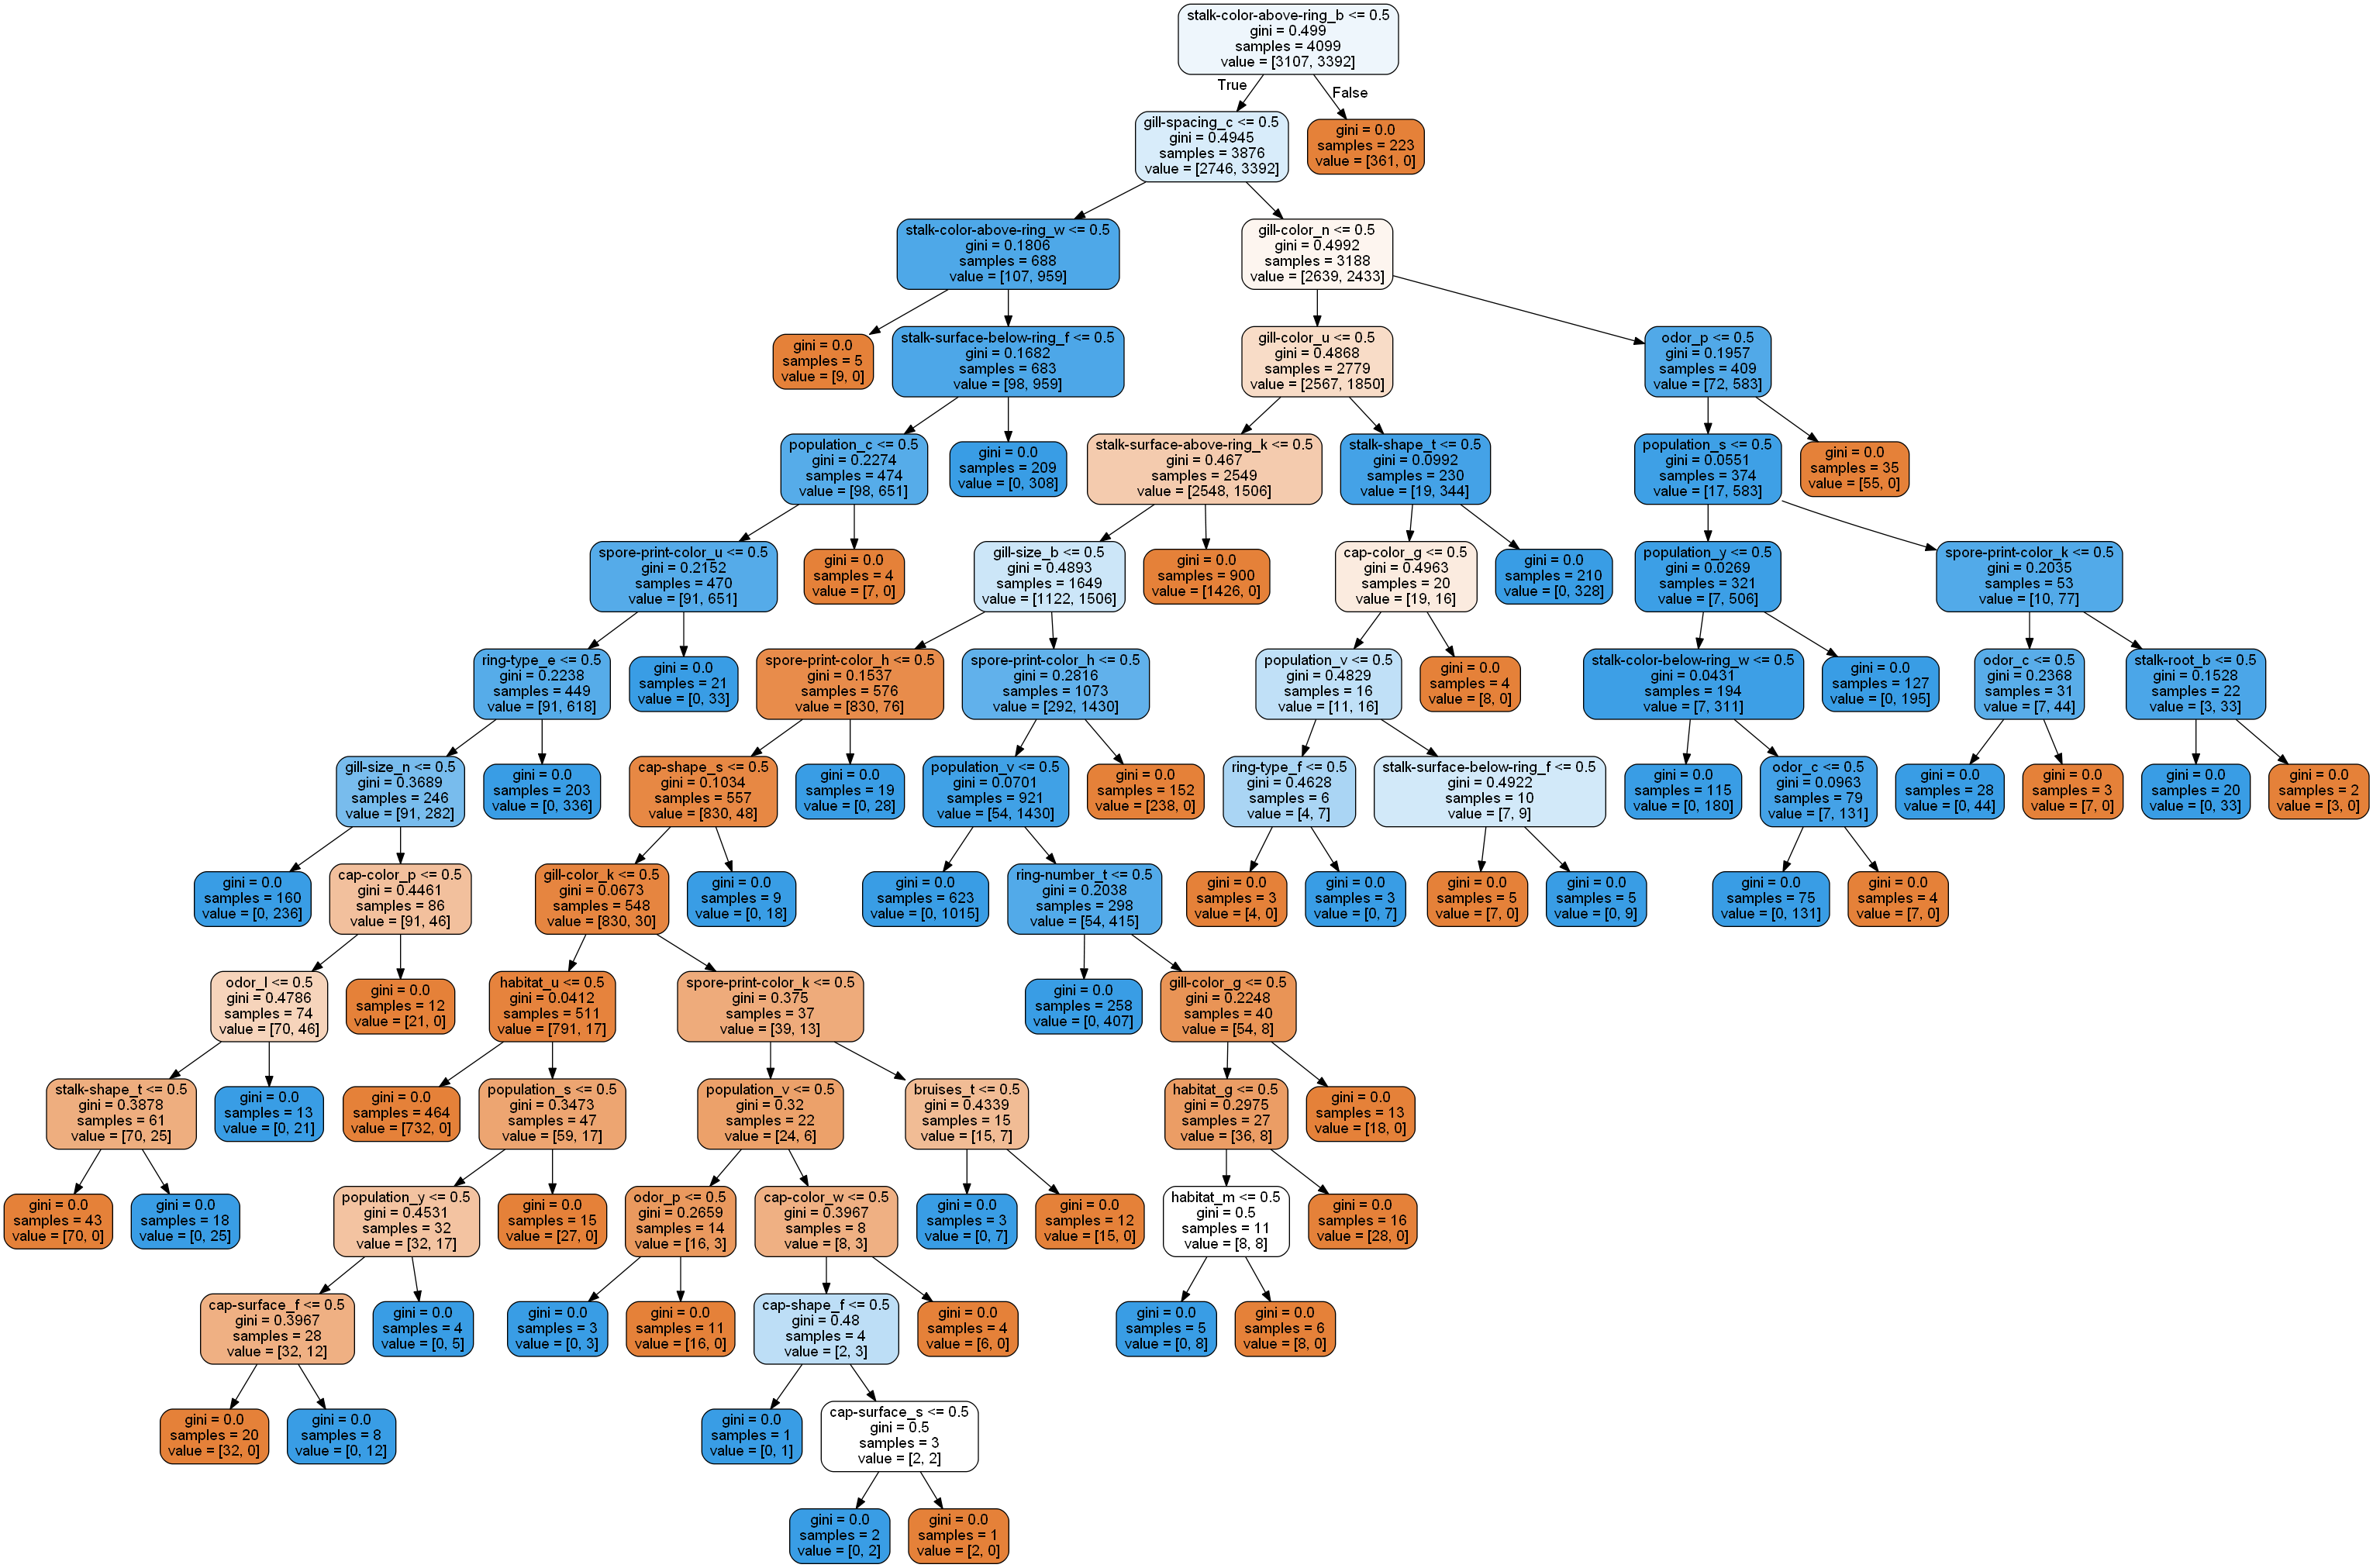

In [12]:
from IPython.display import Image
from IPython.display import display

# note: get lots of errors; try launching with:
# jupyter notebook --NotebookApp.iopub_data_rate_limit = 10000000

imgs = ['%s.png' % s for s in tree_name]

for i in imgs:
    display(Image(filename=i))

It's kind of a big mess, but it **IS** a visualization.  It's not incredibly easy at the moment to interpret, but I have hopes to make sense of it eventually.

[Here's one description](http://chrisstrelioff.ws/sandbox/2015/06/08/decision_trees_in_python_with_scikit_learn_and_pandas.html) of the scores and their meaning.

What's interesting is that multiple different trees are constructed that appear to vary quite greatly in their estimation of what features are most important.  Other than the varying topologies of the 5 decision trees above, the graph of feature importances created earlier shows HUGE standard deviations, and the order of the features gets reshuffled whenever I re-run this notebook.  So **the outcomes are very diverse and yet they all manage to yield predictions with 100% accuracy**.

If the desired outcome is being able to plug a mushroom's features into a model and spit out a prediction of whether or not it is edible, this approach has been an obvious success: that problem is solved.  If, however, the goal is to generate a biologically intuitive understanding of *why* certain features are diagnostic for toxicity, I really have only scratched the surface here.  

I may come back at a later date and play with this dataset more to improve my ability to tear apart the output models and gain a better understanding of how to translate their high accuracy into a human-readable synopsis relevant to mushroom hunting.  For now, however, I'm mostly just surprised this dataset was so straightforward to predict, and am interested in moving on to trying a more complicated one.

There's no question that this exercise was valuable in terms of playing with all-categorical data to classify a binary label, and I should consider other datasets on the criterion of their novelty and instructive potential.